DAY 1 – Load Dataset & Exploration

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)
df = housing.frame

print(df.shape)
df.head()


(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


DAY 2 – Data Cleaning & Visualization

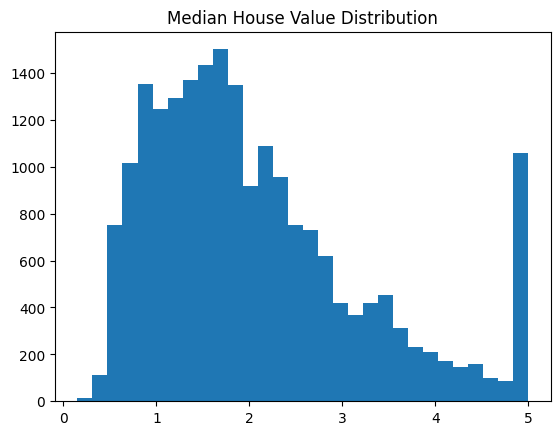

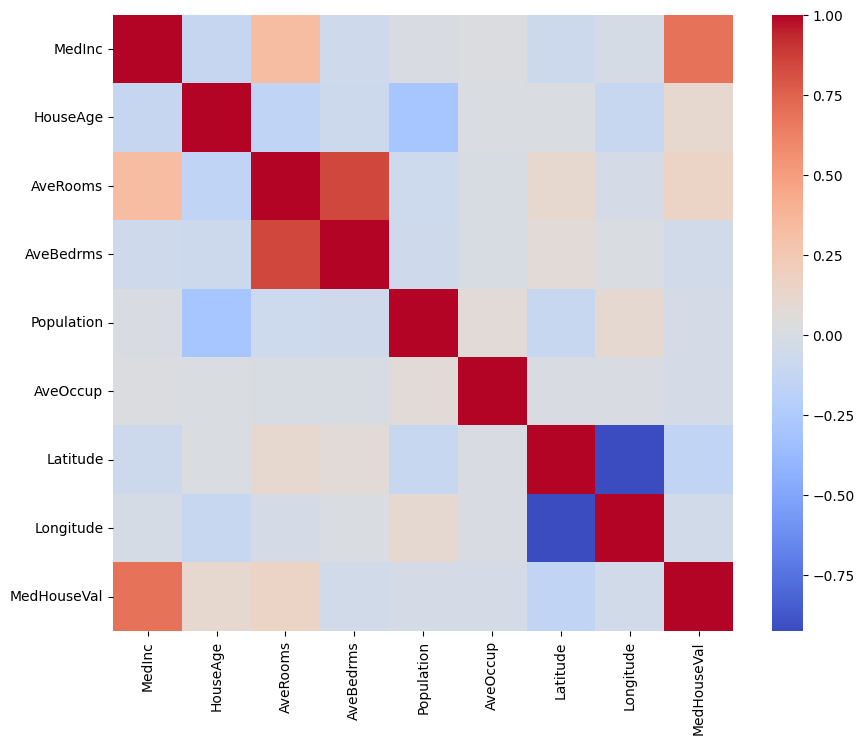

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of target
plt.hist(df['MedHouseVal'], bins=30)
plt.title("Median House Value Distribution")
plt.show()

# Correlation heatmap (subset)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()


DAY 3 – Train/Test Split + Scaling

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


DAY 4 – Train Baseline Linear Regression

In [7]:
pip install --upgrade scikit-learn



  Using cached scikit_learn-1.8.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.8.0-cp312-cp312-win_amd64.whl (8.0 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


  You can safely remove it manually.


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE:", rmse)
print("R2 Score:", r2_score(y_test, pred))



RMSE: 0.7455813830127764
R2 Score: 0.5757877060324508


DAY 5 – Ridge & Lasso Regression

In [11]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

print("Ridge RMSE:", ridge_rmse)
print("Lasso RMSE:", lasso_rmse)



Ridge RMSE: 0.7455567442814779
Lasso RMSE: 0.7404423656125414


DAY 6 – Residual Analysis & Visualization

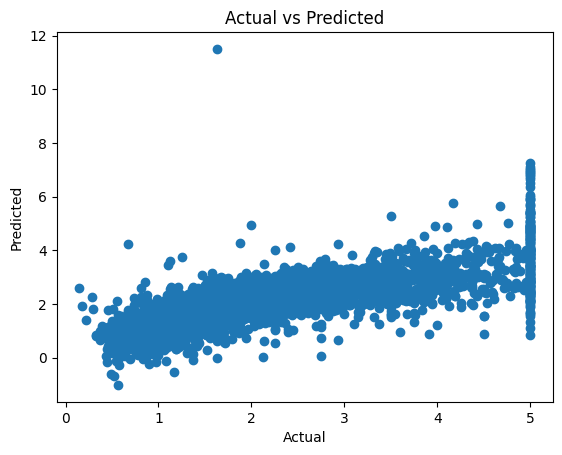

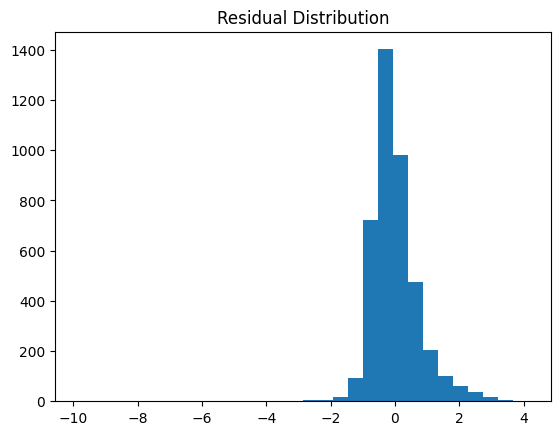

In [12]:
plt.scatter(y_test, pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

residuals = y_test - pred
plt.hist(residuals, bins=30)
plt.title("Residual Distribution")
plt.show()


DAY 7 – Save Model & Full Pipeline

In [13]:
import joblib

joblib.dump(lr, "week10_final_model.pkl")
print("Final model saved successfully!")

# Optional: End-to-end prediction
sample = X_test[0].reshape(1,-1)
print("Sample Prediction:", lr.predict(sample))


Final model saved successfully!
Sample Prediction: [0.71912284]
